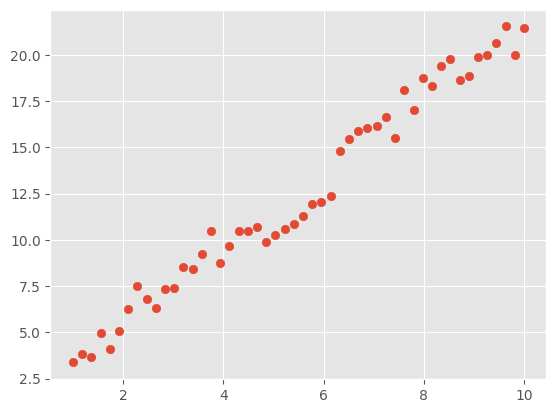

In [26]:
import torch
from matplotlib import pyplot as plt

%matplotlib inline

torch.manual_seed(10)  # 随机数种子
x = torch.linspace(1, 10, 50)  # 生成等间距张量
y = 2 * x + 3 * torch.rand(50)

plt.style.use("ggplot")  # 使用 ggplot 绘图样式
plt.scatter(x, y)

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)


LinearRegressionModel()

LinearRegressionModel(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
model = LinearRegressionModel()  # 实例化模型

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)

In [37]:
loss_fn, opt

(MSELoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [47]:
print("Start training, please be patient.")

for epoch in range(100):
    x = x.reshape(len(x), 1)  # 输入 x 张量
    y = y.reshape(len(x), 1)  # 输入 y 张量
    outputs = model(x)  # 前向传播
    loss = loss_fn(outputs, y)  # 传入模型输出和真实标签
    opt.zero_grad()  # 优化器梯度清零，否则会累计
    loss.backward()  # 从最后 loss 开始反向传播
    opt.step()  # 优化器迭代
    # 自定义训练输出样式
    if (epoch + 1) % 10 == 0:
        print(
            "Epoch [{}/{}], Train loss: {:.3f}".format(epoch + 1, 100, loss.item())
        )


Start training, please be patient.
Epoch [10/100], Train loss: 0.696
Epoch [20/100], Train loss: 0.696
Epoch [30/100], Train loss: 0.696
Epoch [40/100], Train loss: 0.696
Epoch [50/100], Train loss: 0.696
Epoch [60/100], Train loss: 0.696
Epoch [70/100], Train loss: 0.696
Epoch [80/100], Train loss: 0.696
Epoch [90/100], Train loss: 0.696
Epoch [100/100], Train loss: 0.696


In [51]:
weight = model.state_dict()['fc1.weight']  # 权重
bias = model.state_dict()['fc1.bias']  # 偏置项
weight,bias

(tensor([[2.0310]]), tensor([1.3303]))

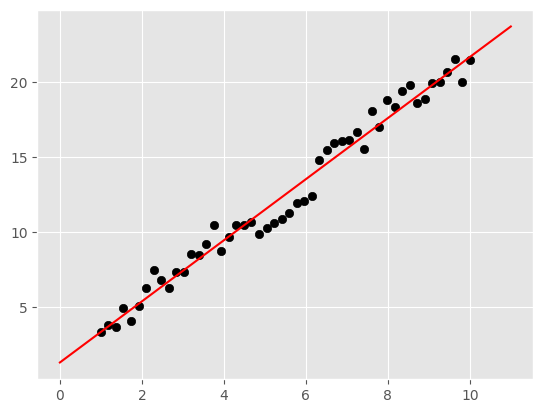

In [52]:
plt.scatter(x, y, c='black')
plt.plot([0, 11], [bias, weight[0] * 11 + bias], 'r')